<center><h2>Challenge: Classifications with SVMs</h2></center>

For the remainder of this notebook, you'll use everything you've learned in DS2 to use a Support Vector Classifier on the [Wisconsin Breast Cancer Dataset](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).  Note that you **_do not need to download the dataset_**, as it comes preloaded as a sample in sklearn.  To get the data, just use the `load_breast_cancer()` method found within `sklearn.datasets`.

**_Challenge_**:

1.  Import and explore the dataset.  Recall the `load_breast_cancer()` method will return an object that contains the data in `.data`, the labels in `.target`, and the column names in `.feature_names` attributes.  
2.  Build a **_Correlation Heatmap_** using **_Seaborn_** to check for each feature's correlation with the labels. 
3.  Build a second **_Correlation Heatmap_** using **_Seaborn_** to check for **_mutlicollinearity_** between features.  
4.  Scale and transform the data using a `StandardScaler()` object and any appropriate methods it contains.
5.  Split the newly scaled data into training and testing sets using `train_test_split()`.
6.  Create an `SVC()` object, which can be found in `sklearn.svm`
7.  Fit the model to the scaled data. 
8.  Use your validation data to check the accuracy metrics for your model.  


**_Stretch Challenge_**: 

1. Try different parameters such as different kernels to see how it affects the overall performance of the model.  For a full list of the tunable parameters you can use with an SVC, see [the documentation](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) on sklearn.org. 

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metric
from sklearn import svm
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [9]:
breast_cancer = load_breast_cancer()

df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
display(df.head())

targets = breast_cancer.target

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


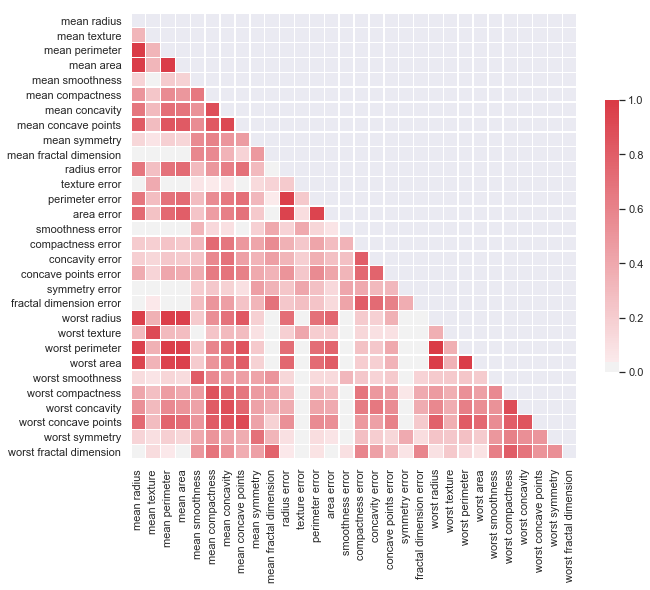

In [28]:
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=0, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})